In [ ]:
!pip install tensorflow==2.6.0
import tensorflow as tf
print(tf.__version__)

In [ ]:
!pip install tensorflow==2.6.0 keras==2.6.0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet101
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import metrics

# 데이터 경로
train_dir = '/content/drive/MyDrive/datasets2/train'
val_dir = '/content/drive/MyDrive/datasets2/val'

# 이미지 크기 및 채널
img_size = (224, 224)
img_channel = 3

# 이미지 데이터 전처리
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    brightness_range=(0.8,1.8),
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical') # categorical, binary, sparse 선택

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical') # categorical, binary, sparse 선택

# ResNet101 모델 불러오기
resnet = ResNet101(input_shape=(img_size[0], img_size[1], img_channel), weights='imagenet', include_top=False) # ImageNet으로 사전 학습된 가중치를 초기 가중치로 사용

# 새로운 분류층 추가
x = resnet.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
predictions = layers.Dense(6, activation='softmax')(x) # 클래스 개수만큼 조정

model = models.Model(inputs=resnet.input, outputs=predictions)

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 체크포인트를 저장할 경로
checkpoint_filepath = '/content/drive/MyDrive/checkpoint/checkpoints_class_reduced/model-{epoch:03d}.h5'

# 체크포인트 콜백 설정
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    save_best_only=False,
    save_weights_only=True,
    verbose=1)

# 모델 학습
history = model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=50,
          validation_data=validation_generator,
          validation_steps=len(validation_generator),
          callbacks=[checkpoint_callback]) # 체크포인트 인자 추가

Found 7213 images belonging to 6 classes.
Found 1968 images belonging to 6 classes.
171446536/171446536 [==============================] - 1s 0us/step
Epoch 1/50
451/451 [==============================] - ETA: 0s - loss: 1.0824 - accuracy: 0.5626
Epoch 1: saving model to /content/drive/MyDrive/checkpoint/checkpoints_class_reduced/model-001.h5
451/451 [==============================] - 2283s 5s/step - loss: 1.0824 - accuracy: 0.5626 - val_loss: 6.3079 - val_accuracy: 0.1540
Epoch 2/50
451/451 [==============================] - ETA: 0s - loss: 0.2294 - accuracy: 0.9213
Epoch 2: saving model to /content/drive/MyDrive/checkpoint/checkpoints_class_reduced/model-002.h5
451/451 [==============================] - 333s 739ms/step - loss: 0.2294 - accuracy: 0.9213 - val_loss: 18.5297 - val_accuracy: 0.1524
Epoch 3/50
451/451 [==============================] - ETA: 0s - loss: 0.1185 - accuracy: 0.9602
Epoch 3: saving model to /content/drive/MyDrive/checkpoint/checkpoints_class_reduced/model-003.h

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# 조기 종료 콜백 설정
early_stopping_callback = EarlyStopping(
    monitor='val_loss', # 검증 손실을 기준으로 조기 종료를 판단합니다.
    patience=5, # 검증 손실이 최소 5 에포크 동안 개선되지 않으면 학습을 중단합니다.
    restore_best_weights=True) # 가장 낮은 검증 손실을 가진 모델의 가중치를 복원합니다.

# 모델 학습
history = model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=100,
          validation_data=validation_generator,
          validation_steps=len(validation_generator),
          callbacks=[checkpoint_callback, early_stopping_callback]) # EarlyStopping 콜백을 callbacks 인자에 추가합니다.

# 모델 학습 코드에 추가

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet101
from tensorflow.keras import layers, models
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import ModelCheckpoint

train_dir = '/content/drive/MyDrive/dataset/train'
val_dir = '/content/drive/MyDrive/dataset/val'

img_size = (224, 224)
img_channel = 3

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    brightness_range=(0.8,1.8),
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical') # categorical, binary, sparse 선택

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical') # categorical, binary, sparse 선택

resnet = ResNet101(input_shape=(img_size[0], img_size[1], img_channel), weights=None, include_top=False) # 가중치 체크포인트 파일을 불러오므로 None으로 설정

x = resnet.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
predictions = layers.Dense(16, activation='softmax')(x) # 클래스 개수만큼 조정

model = models.Model(inputs=resnet.input, outputs=predictions)

# 이전에 저장된 모델 가중치 불러오기
model.load_weights('/content/drive/MyDrive/checkpoints/model-049.h5') # 경로 작성

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_filepath = '/content/drive/MyDrive/checkpoints/model-{epoch:03d}.h5'

checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    save_best_only=False,
    save_weights_only=True,
    verbose=1)

# 학습 이어서 시작
history = model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=100,
          validation_data=validation_generator,
          validation_steps=len(validation_generator),
          callbacks=[checkpoint_callback],
          initial_epoch=49) # initial_epoch = 이전에 중단된 epoch 숫자

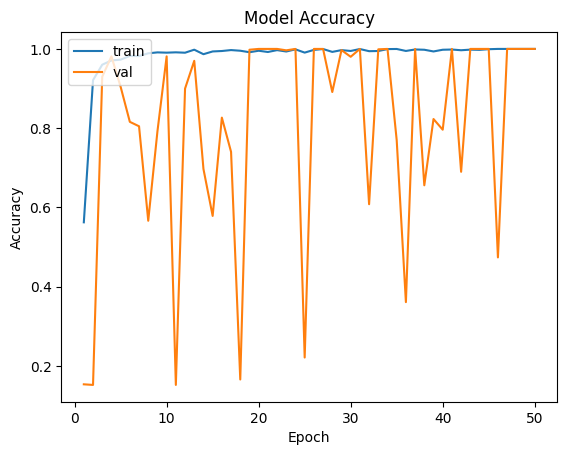

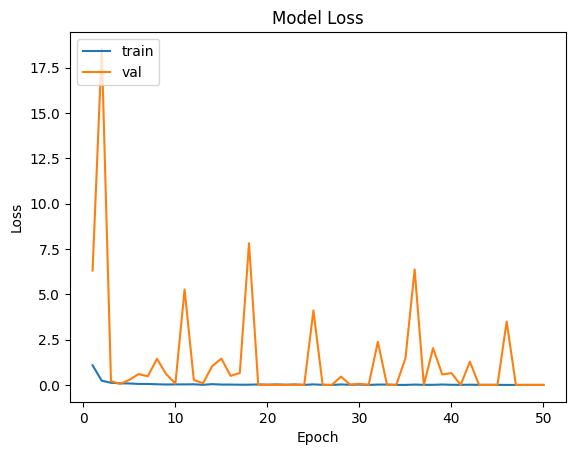

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 학습 곡선 그리기
num_epochs = len(history.history['accuracy'])
epoch_range = np.arange(1, num_epochs + 1)

plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# 구글 드라이브에 모델 저장
model.save('/content/drive/MyDrive/ResNet101_6class.h5')

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# 테스트 데이터 폴더 경로
test_dir = '/content/drive/MyDrive/test'

image_size = (224, 224)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=1,
    shuffle=False,
    class_mode='categorical')

# 저장된 모델 경로
model = load_model('/content/drive/MyDrive/ResNet101_6class.h5')

# 분류 및 평가
Y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 출력
print('테스트 결과')
print('---------------------')
for i, filename in enumerate(test_generator.filenames):
    print('{} : {}'.format(filename, class_labels[y_pred[i]]))

accuracy = accuracy_score(true_labels, y_pred)
precision = precision_score(true_labels, y_pred, average='macro')
recall = recall_score(true_labels, y_pred, average='macro')
f1score = f1_score(true_labels, y_pred, average='macro')

print('---------------------')
print('정확도 : {:.2f}'.format(accuracy))
print('정밀도 : {:.2f}'.format(precision))
print('재현율 : {:.2f}'.format(recall))
print('F1-score : {:.2f}'.format(f1score))

Found 349 images belonging to 6 classes.
349/349 [==============================] - 76s 214ms/step
테스트 결과
---------------------
back_left/back_left0.jpg : back_left
back_left/back_left100.jpg : left
back_left/back_left107.jpg : back_left
back_left/back_left128.jpg : back_left
back_left/back_left138.jpg : back_right
back_left/back_left146.jpg : back_left
back_left/back_left16.jpg : back_left
back_left/back_left162.jpg : back_left
back_left/back_left165.jpg : back_left
back_left/back_left170.jpg : back_left
back_left/back_left18.jpg : back_left
back_left/back_left180.jpg : back_left
back_left/back_left195.jpg : back_left
back_left/back_left200.jpg : back_left
back_left/back_left50.jpg : back_left
back_left/back_left54.jpg : back_left
back_left/back_left74.jpg : back_left
back_left/back_left83.jpg : left
back_left/back_left92.jpg : back_left
back_left/back_left94.jpg : left
back_left/back_left97.jpg : left
back_left/back_left_hurray102.jpg : back_left
back_left/back_left_hurray109.jpg : b

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
